# NAVER 한달살기 - 클러스터링(1. 위계적)

 참조사이트
 -  https://m.blog.naver.com/j7youngh/222864205826

In [1]:
# !pip install matplotlib seaborn sklearn konlpy scikit-learn wordcloud pyLDAvis gensim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from konlpy.tag import Okt
okt = Okt() 
from collections import Counter

import matplotlib.pyplot as plt

plt.rc('font', family='malgun Gothic') 

In [2]:
df = pd.read_csv('./data/naver_month.csv')
df

,title,contents,time,blog_text,key
0,돌아기랑 제주도한달살기 24일째(406일) : 비양도,첨에 제주도 한달살기 올때도 어디갈지 생각을 안하고 와서 매번 전날이나 아침에 오늘...,2023.11.27,첨에 제주도 한달살기 올때도 어디갈지 생각을 안하고 와서 매번 전날이나 아침에 오늘...,한달살기
1,"제주도 한달살기 (20) - 우도 코코나라, 문빵구, 돌담집, 몬딱...",한달살기 중 두번째 우도 ㅎㅎ 처음은 전기차를 빌렸지만 이번엔 카트형식으로 나란히 ...,2023.11.07,한달살기 중 두번째 우도 ㅎㅎ처음은 전기차를 빌렸지만 이번엔 카트형식으로 나란히 앉...,한달살기
2,제주동쪽숙소 제주도한달살기하기 좋은 구좌 제주오션뷰2차♪,#제주오션뷰2차 #제주도펜션 #제주동쪽숙소 제주에는 크게 동쪽과 서쪽으로 나뉘면서 ...,2023.12.13,#제주오션뷰2차#제주도펜션#제주동쪽숙소제주에는 크게 동쪽과 서쪽으로 나뉘면서 다양한...,한달살기
3,제주도 한달살기 비용 (한달살이 생활비),제주도 한달살기는 돈이 적게 들지는 않지만 우리 가족에게 꽤 많은 추억을 남겼으므로...,2022.02.23,"2021년 4월에 제주도 한달살기를 하고 왔다.세식구 기준(어른 둘, 아기 하나)으...",한달살기
4,제주도 한달살기 숙소 비용 제주 중문 애견동반 더맨션 이이공공,그중에서도 제일 마음에 들었던 건 오후 시간 깊숙이 들어오는 가을 햇살 창밖에 보이...,2023.10.14,이번에는 좀 여유로운 여행을 하고 싶어서다소 긴 일정으로 제주도에 방문했어요.여행...,한달살기
...,...,...,...,...,...
1932,제주도한달살이,드뎌 육지다~ 뒤로 보이는 육지가 제주항이네요. 3다도인 제주에 좋은 추억도 많이 ...,2020.12.18,#제주도 #제주한달살이#실버크클라우드코로나19로 발이묶인 윈드서퍼들의차선택은~~ 한...,한달살이
1933,[제주도 한달살이] 제주도 게스트하우스 스텝 후기...,"연돈 예약 성공해서 연돈도 먹고, 한라산 등산도 가고, 스쿠버다이빙도 배우고, 저녁...",2023.05.28,22년12월28일~23년2월4일약 한달동안 제주살이를 했다.(글 마지막에 스텝 꿀팁...,한달살이
1934,제주도 한달살이 시작!!!,무계획으로 출발 하는 제주도 한달살이!!! 퇴사를 하고 나니 새로운 환경에서 살아보...,2022.03.16,무계획으로 출발 하는 제주도 한달살이!!!퇴사를 하고 나니 새로운 환경에서 살아보고...,한달살이
1935,[제주도 한달살이 이야기] 평산제면소에서 마제소바먹고 러닝후...,제주도에선 술 잘 안먹겠다고 다짐했는데 거의 하루 한캔은 아니여도 한모금씩은 매일 ...,2022.02.20,오늘은 숙소 근처에 있다는 마제소바 집에 들렸어요맛집이라고 해서 저번에 왔었는데그때...,한달살이


In [3]:
# df 수집 오류 결과 확인
(df == 'error').sum()

title        0
contents     0
time         0
blog_text    0
key          0
dtype: int64

In [4]:
df.isnull().sum()
# blog_text가 nan인 행 존재 -> 제외

title        0
contents     0
time         0
blog_text    3
key          0
dtype: int64

In [5]:
df[df['blog_text'].isna() == 1]

,title,contents,time,blog_text,key
1807,제주도 한달살이 스물한번째 날,제주도 한달살이 스물한번째 날입니다 오늘은 제주도에 오후부터 비가 예보 되있어서 나...,2022.03.30,NaN,한달살이
1882,제주도 한달살이 스물여덟번째 날,제주도 한달살이 스물여덟번째 날입니다 이제 제주도 살이 삼일 남았습니다 이번주는 날...,2022.04.07,NaN,한달살이
1919,제주도 한달살이 열다섯번째 날,제주도 한달살이 열다섯번째 날 입니다 벌써 한달중 절반이 지나가는군요 아침에 일어나...,2022.03.24,NaN,한달살이


In [6]:
# blog_text가 nan인 겨우 제외
df = df[df['blog_text'].isna() != 1]

### 클러스터링 1 - 위계적


In [7]:
stopwords = set([])

web_stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
web_stopwords[:10]

for i in web_stopwords:
    stopwords.add(i[0])

print(len(stopwords))

jeju_stopwords = [ '리뷰', '숙소', '정말', '동안', '다음', '바로', '근처', '조금', '시간',
                   '호스트', '정도', '방문', '사장', '이용', '다시', '예약', '살이', '살기', '아주', '추천', '하루', '이번',
                   '처음', '달동', '저희', '하나', '사용', '모두', '진짜', '일주일', '보름', '선택', '시작', '한번', '가장', '마음',
                   '제외', '이동', '무엇', '준비', '그냥', '감사',  '덕분', '후기', '기회',  '다른', '여기', '우리',
                   '미스터', '미스터멘션', '멘션', '때문', '오늘', '도착', '보고', '마지막', '가지', '이제', '지금', '모습', '위해',
                   '타고', '사실', '포스팅', '주문', '역시', '침대', '거실', '매일', '출발', '소개', '기억', '참고', '계속', '객실',
                   '일차', '이야기', '요즘', '이유', '경우', '일단', '거의', '스텝', '제일', '자주', '어디', '마무리', '아래', '운영',
                   '이상', '의자', '별로', '원래', '중간', '뭔가', '첫째', '체크', '잠시', '언제', '살짝', '해도', '계단', '부분', '냉장고',
                   '침실', '기본', '제공', '일찍', '인테리어', '완전', '추가', '등등', '매우', '가야', '그때', '기간', '마치', '가득', '대부분',
                   '미리', '둘째', '근무', '공간', '스테이', '알파', '엄마', '아빠', '아들', '일정', '계획', '아침', '주방', '서울', '육지',
                   '점심', '저녁', '자리', '두리', '언니', '가격', '건물', '숙박', '만원', '가기', '코로나' ,                   
                   '호텔', '펜션', '게스트하우스', '독채','화장실', '욕실', '숙박', '세탁기', '가면', '직접', '비용', '길이',
                    '여행', '트립', '제주', '제주도', '생각', '느낌',
                    '광고', '스텝', '블로그', '개월', '도서관', '스탭'
                   ]
for word in jeju_stopwords:
    stopwords.add(word)

print(len(stopwords))


594
739


In [8]:
# 한글만 추출해서 okt로 명사화하고
# 명사의 길이가 2이상이고, 불용어에 해당하지 않는 것들만 모으는
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer - 단어를 tokenize 해서 
vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
vect

CountVectorizer(tokenizer=<function <lambda> at 0x00000203C82E4550>)

In [10]:
# Bag of words 만들기
# Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법
bow_vect = vect.fit_transform(df['blog_text'].tolist())
bow_vect

d:\song\venvs\project1\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<1934x20925 sparse matrix of type '<class 'numpy.int64'>'
	with 187172 stored elements in Compressed Sparse Row format>

In [11]:
# bow 의 단어 
word_list = vect.get_feature_names_out()
word_list


array(['가가', '가감', '가건물', ..., '힝구', '힝차', '힝힝'], dtype=object)

In [12]:
# bow 의 단어 빈도수
count_list = bow_vect.toarray().sum(axis=0)
count_list

array([9, 1, 1, ..., 2, 1, 2], dtype=int64)

In [13]:
# 딕셔너리 데이터를 쌍(items(key, value))으로 불러와 두 번째 값(value)으로 정렬해 컬럼명을 만듦
# value -> 단어 명을  
columns = []
for k, v in sorted(vect.vocabulary_.items(), key=lambda item:item[1]): 
  columns.append(k)


In [14]:
df = pd.DataFrame(bow_vect.toarray(), columns = columns) # DTM 만들기
df


,가가,가감,가건물,가게,가겐,가격표,가결,가경,가계,가계부,...,힙할,힙함,힙합,힙해,힙했던,힙혀,힛제,힝구,힝차,힝힝
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_tdm = df.T  # DTM 만들기
df_tdm

,0,1,2,3,4,5,6,7,8,9,...,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933
가가,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가감,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가건물,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가게,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
가겐,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
힙혀,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힛제,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힝구,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
힝차,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# 단어 총 빈도수 계산
df_tdm['total'] = df_tdm.sum(axis=1)   
df_tdm.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,total
가가,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
가감,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
가건물,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
 # 빈도수 상위 50개 추출
df_words = df_tdm[df_tdm['total'].rank(ascending=False) <= 50] # 빈도수 상위 50개 추출
df_words= df_words.drop('total', axis=1)    # 컬럼 'total' 제거
df_words[:5]

,0,1,2,3,4,5,6,7,8,9,...,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933
가족,0,1,0,2,0,0,5,1,1,5,...,0,0,0,1,0,0,0,0,0,0
거리,0,0,0,0,2,0,5,1,0,0,...,0,0,0,0,0,0,0,0,1,2
걱정,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,1,0,0,0
겨울,0,0,0,1,0,0,1,0,4,2,...,0,0,4,0,0,0,2,0,0,0
공항,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 위계적 군집분석

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt

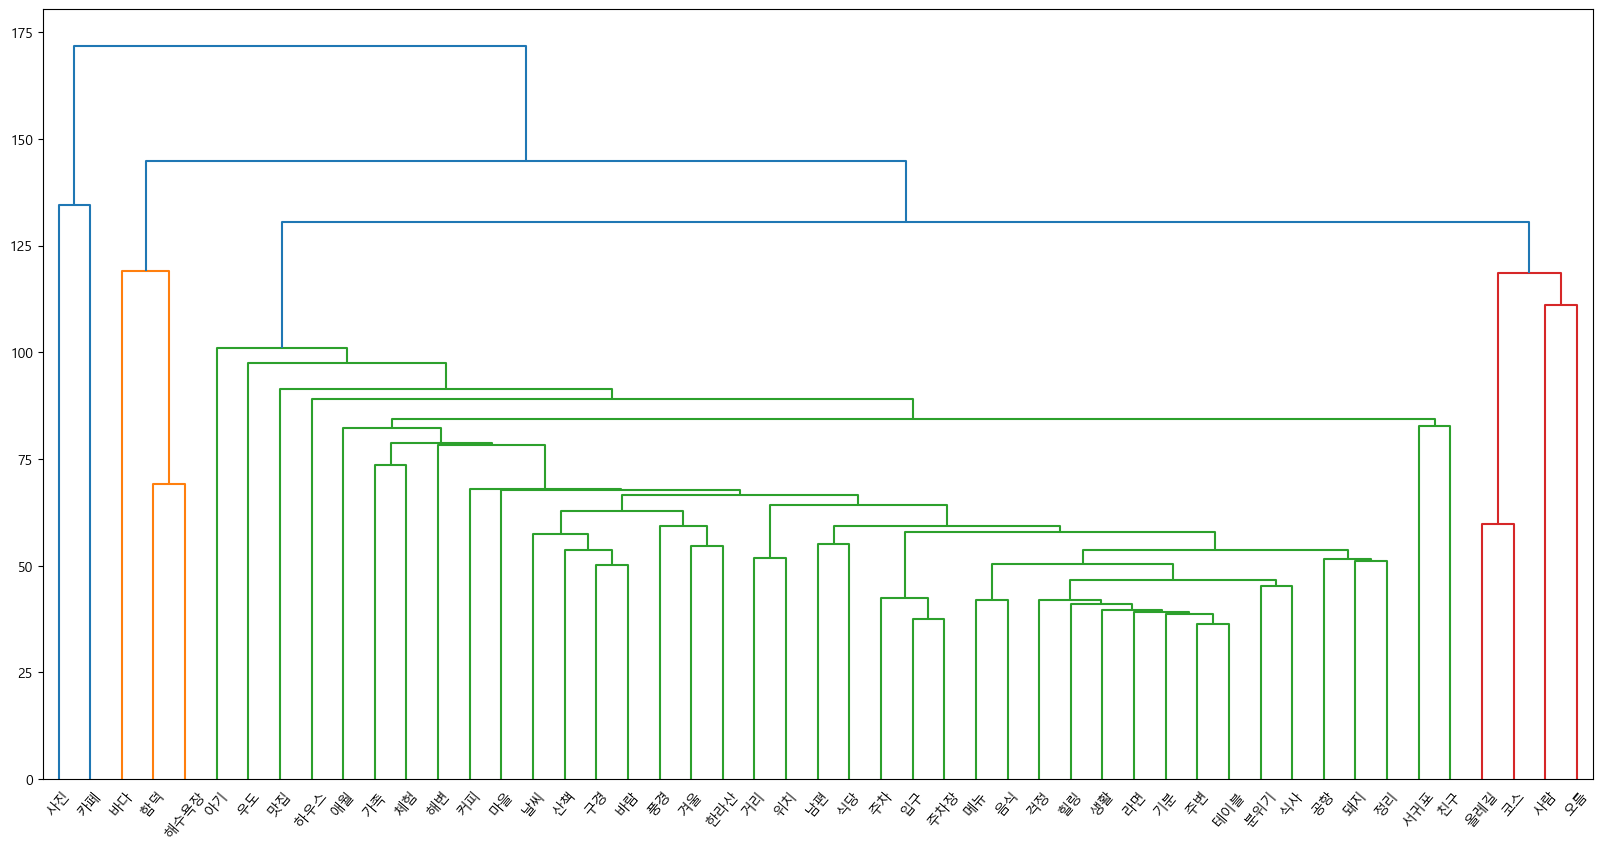

<Figure size 640x480 with 0 Axes>

In [19]:
# 전단계에서 그림을 그려보는
# 군집 방식은 ward로 거리는 유크리디안으로 측정해 군집분석

clusters = linkage(df_words, method='ward', metric='euclidean')

# 덴드로그램 그리기

plt.figure(figsize=(20, 10))               # 이미지 크기 설정
dendrogram(clusters,
           leaf_rotation=50,               # 라벨 50% 기울리기
           leaf_font_size=10,              # 라벨 폰트 크기
           labels=df_words.index)          # 라벨에 사용할 변수
plt.show()

plt.savefig('./result/clustering_hier.png')

In [20]:
# 클러스터링 해서 그룹을 할당해주는

from sklearn.cluster import AgglomerativeClustering

cluster_num  = 5

ward = AgglomerativeClustering(n_clusters=cluster_num, affinity='euclidean', linkage='ward')
predict = ward.fit_predict(df_words)      # 군집 3개 분리값(0, 1, 2)
df_words['predict'] = predict             # 해당 군집값(0, 1, 2)을 원본 데이터에 붙이기
df_words[:5]

d:\song\venvs\project1\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,predict
가족,0,1,0,2,0,0,5,1,1,5,...,0,0,1,0,0,0,0,0,0,1
거리,0,0,0,0,2,0,5,1,0,0,...,0,0,0,0,0,0,0,1,2,1
걱정,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,1,0,0,0,1
겨울,0,0,0,1,0,0,1,0,4,2,...,0,4,0,0,0,2,0,0,0,1
공항,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [21]:
cluster_1 = df_words[df_words['predict'] == 0].index
print("군집 1: ", cluster_1)
cluster_2 = df_words[df_words['predict'] == 1].index
print("군집 2: ", cluster_2)
cluster_3 = df_words[df_words['predict'] == 2].index
print("군집 3: ", cluster_3)
cluster_4 = df_words[df_words['predict'] == 3].index
print("군집 4: ", cluster_4)
cluster_5 = df_words[df_words['predict'] == 4].index
print("군집 5: ", cluster_5)
# cluster_6 = df_words[df_words['predict'] == 5].index
# print("군집 6: ", cluster_6)
# cluster_7 = df_words[df_words['predict'] == 6].index
# print("군집 7: ", cluster_7)

군집 1:  Index(['바다', '함덕', '해수욕장'], dtype='object')
군집 2:  Index(['가족', '거리', '걱정', '겨울', '공항', '구경', '기분', '날씨', '남편', '돼지', '라면', '마을',
       '맛집', '메뉴', '바람', '분위기', '산책', '생활', '서귀포', '식당', '식사', '아기', '애월',
       '우도', '위치', '음식', '입구', '정리', '주변', '주차', '주차장', '체험', '친구', '커피',
       '테이블', '풍경', '하우스', '한라산', '해변', '힐링'],
      dtype='object')
군집 3:  Index(['사람', '오름', '올레길', '코스'], dtype='object')
군집 4:  Index(['사진'], dtype='object')
군집 5:  Index(['카페'], dtype='object')


In [22]:
temp_hier = []
for i in range(cluster_num):
    temp = i, df_words[df_words['predict'] == i].index.to_list()
    temp_hier.append(temp)

df_hier = pd.DataFrame(temp_hier)
df_hier.columns = ['group', 'keyword']
df_hier 

,group,keyword
0,0,"[바다, 함덕, 해수욕장]"
1,1,"[가족, 거리, 걱정, 겨울, 공항, 구경, 기분, 날씨, 남편, 돼지, 라면, 마..."
2,2,"[사람, 오름, 올레길, 코스]"
3,3,[사진]
4,4,[카페]


In [23]:
df_hier.to_csv('./result/clustering_hier.csv', index= False)